This time series analysis hopes to find a coorelation between accident location, type of issue, time taken to resolve issue, time of day, day of week, and month of year. This will help predict when and where an accident is likely to happen.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [50]:
file = 'C:/Users/tomsh/OneDrive/Documents/Real-Time_Traffic_Incident_Reports/Real-Time_Traffic_Incident_Reports.csv'


In [51]:
df = pd.read_csv(file, parse_dates=['Published Date', 'Status Date'])
df.head()


,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00


The column names have spaces in them. This will prove to be a problem with creating visualizations later so I'm going to change the variable names for the applicable columns.

In [52]:
df=df.rename(columns = {'Published Date':'published_date'})
df=df.rename(columns = {'Status Date':'status_date'})
df=df.rename(columns = {'Issue Reported':'issue_reported'})
df=df.rename(columns = {'Traffic Report ID':'tr_ID'})
df.head()

,tr_ID,published_date,issue_reported,Location,Latitude,Longitude,Address,Status,status_date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00


Exploring the Data and Converting Datatypes

In [53]:
df.shape
#big enough

(249650, 9)

In [54]:
df.describe()
#I assume I only get one column because it's the only numerical data type(float)

,Longitude
count,249571.000000
mean,-97.551690
std,4.211096
min,-98.816154
25%,-97.776950
50%,-97.734295
75%,-97.687038
max,0.000000


In [55]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors = 'coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249650 entries, 0 to 249649
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   tr_ID           249650 non-null  object             
 1   published_date  249650 non-null  datetime64[ns, UTC]
 2   issue_reported  249650 non-null  object             
 3   Location        249107 non-null  object             
 4   Latitude        249525 non-null  float64            
 5   Longitude       249571 non-null  float64            
 6   Address         249650 non-null  object             
 7   Status          247957 non-null  object             
 8   status_date     249650 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(2), object(5)
memory usage: 17.1+ MB
None


In [56]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249650 entries, 0 to 249649
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   tr_ID           249650 non-null  object             
 1   published_date  249650 non-null  datetime64[ns, UTC]
 2   issue_reported  249650 non-null  object             
 3   Location        249107 non-null  object             
 4   Latitude        249525 non-null  float64            
 5   Longitude       249571 non-null  float64            
 6   Address         249650 non-null  object             
 7   Status          247957 non-null  object             
 8   status_date     249650 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(2), object(5)
memory usage: 17.1+ MB


In [57]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

#So it may be better to create a new location variable as there are far less null values for longitude and latitude 
#than for location. Status can likely be removed entirely.
#Clearly the attempt to turn location into a float did not work. Also, instances of null in Latitude increased by 46.

,count,%
tr_ID,0,0.000000
published_date,0,0.000000
issue_reported,0,0.000000
Address,0,0.000000
status_date,0,0.000000
Longitude,79,0.031644
Latitude,125,0.050070
Location,543,0.217505
Status,1693,0.678149


In [58]:
df['issue_reported'].value_counts()
#Unsure about the meaning of some of these headings mean but the best way to categorize these issues in by 
#subtracting the published date from the status date and finding out how long these issues take to resolve.

Traffic Hazard                77168
Crash Urgent                  58699
Crash Service                 37408
COLLISION                     21856
TRFC HAZD/ DEBRIS             17586
zSTALLED VEHICLE               8930
Traffic Impediment             6255
COLLISION WITH INJURY          6000
LOOSE LIVESTOCK                5994
COLLISN/ LVNG SCN              4275
Stalled Vehicle                2853
COLLISION/PRIVATE PROPERTY      970
VEHICLE FIRE                    821
BLOCKED DRIV/ HWY               502
BOAT ACCIDENT                   102
AUTO/ PED                        66
TRAFFIC FATALITY                 65
ICY ROADWAY                      49
FLEET ACC/ INJURY                33
N / HZRD TRFC VIOL                7
OBSTRUCT HWY                      5
FLEET ACC/ FATAL                  3
HIGH WATER                        2
COLLISN / FTSRA                   1
Name: issue_reported, dtype: int64

In [59]:
issue_date = df[['issue_reported', 'published_date', 'status_date']]
print(issue_date.head())
#As mentioned above, subtracting the published date from the status date will help find out how long these issues 
#take to resolve which will be useful in helping avoid parts of town. 
#The date and time are listed together, which may come in handy when classifying the severity of issues, but the 
#date and time values will have to be seperated when we try to decipher seasonal and time of day data.

   issue_reported            published_date               status_date
0   Crash Service 2018-06-13 06:35:59+00:00 2018-06-13 09:00:03+00:00
1  Traffic Hazard 2018-06-13 10:15:36+00:00 2018-06-13 11:20:03+00:00
2    Crash Urgent 2020-04-17 21:25:03+00:00 2020-04-17 21:55:03+00:00
3  Traffic Hazard 2020-04-17 21:40:52+00:00 2020-04-17 21:55:03+00:00
4    Crash Urgent 2020-04-17 21:00:55+00:00 2020-04-17 23:30:04+00:00


In [60]:
df['Address'].value_counts()
#Clearly some Adresses are more prone to accidents. These appear to be a series of intersections that can also be
#identified through location data. Example: E Parmer Ln & Dessau Rd (177 issues reported) is location
#30.387004,-97.648592 (381 issues reported). This suggests that perhaps the location indicator may be more accurate
#even though addresses are easier to communicate

E Parmer Ln & Dessau Rd                  177
9300 S Ih 35 Svrd Sb                     164
E Riverside Dr & S Pleasant Valley Rd    157
Fm 969 Rd & N Fm 973 Rd                  154
Dessau Rd & E Parmer Ln                  150
                                        ... 
3600 BEE CAVES RD                          1
2424 E RIVERSIDE DR                        1
4830-4851 FM 2222 RD                       1
Eason St & W 12th St                       1
2400 Nightview Dr                          1
Name: Address, Length: 82698, dtype: int64

In [61]:
address_date = df[['Address', 'published_date', 'status_date']]
print(issue_date.head())

   issue_reported            published_date               status_date
0   Crash Service 2018-06-13 06:35:59+00:00 2018-06-13 09:00:03+00:00
1  Traffic Hazard 2018-06-13 10:15:36+00:00 2018-06-13 11:20:03+00:00
2    Crash Urgent 2020-04-17 21:25:03+00:00 2020-04-17 21:55:03+00:00
3  Traffic Hazard 2020-04-17 21:40:52+00:00 2020-04-17 21:55:03+00:00
4    Crash Urgent 2020-04-17 21:00:55+00:00 2020-04-17 23:30:04+00:00


In [62]:
df['Location'].value_counts() 
#It may be a good a idea to remove outliers here and focus on high volume areas.
#Can we create a dataframe that uses a condition on the value_count() function to focus on high frequency areas?

#This no longer works after being changed to float data type.

(30.256997,-97.611818)    396
(30.387004,-97.648592)    381
(30.173724,-97.823807)    370
(30.164182,-97.692911)    349
(30.349292,-97.538573)    306
                         ... 
(30.44083,-97.669188)       1
(30.177644,-97.634777)      1
(30.349459,-97.535701)      1
(30.238739,-97.719591)      1
(30.222618,-97.764384)      1
Name: Location, Length: 116904, dtype: int64

Deleting and Inserting Columns

In [63]:
pub_day = df['published_date'].dt.dayofweek
df['published_day'] = pub_day
df.head()

,tr_ID,published_date,issue_reported,Location,Latitude,Longitude,Address,Status,status_date,published_day
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00,2
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00,2
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00,4
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00,4
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00,4


In [64]:
pub_day = df['status_date'].dt.dayofweek
df['status_day'] = pub_day
df.head()

,tr_ID,published_date,issue_reported,Location,Latitude,Longitude,Address,Status,status_date,published_day,status_day
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00,2,2
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00,2,2
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00,4,4
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00,4,4
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00,4,4


In [65]:
issue_time = df['status_date'] - df['published_date']
df['issue_timespan'] = issue_time
df.head()

,tr_ID,published_date,issue_reported,Location,Latitude,Longitude,Address,Status,status_date,published_day,status_day,issue_timespan
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00,2,2,0 days 02:24:04
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00,2,2,0 days 01:04:27
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00,4,4,0 days 00:30:00
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00,4,4,0 days 00:14:11
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00,4,4,0 days 02:29:09


In [114]:
#issue_timespan_sec = df['issue_timespan'].value_counts()
#df['issue_reported_value'] = issue_reported_value
#df.info()

In [74]:
df['timespan_sec'] = df.issue_timespan.apply(lambda x: x.total_seconds())
df['timespan_min'] = df['timespan_sec']/60
df['timespan_hrs'] = df['timespan_min']/60
df.head()

,tr_ID,published_date,issue_reported,Location,Latitude,Longitude,Address,Status,status_date,published_day,status_day,issue_timespan,issue_reported_value,timespan_sec,timespan_min,timespan_hrs,lat,lon
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00,2,2,0 days 02:24:04,NaN,8644.0,144.066667,2.401111,(30.283797,-97.741906)
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00,2,2,0 days 01:04:27,NaN,3867.0,64.450000,1.074167,(30.339593,-97.700963)
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00,4,4,0 days 00:30:00,NaN,1800.0,30.000000,0.500000,(30.329455,-97.638105)
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00,4,4,0 days 00:14:11,NaN,851.0,14.183333,0.236389,(30.202806,-97.760701)
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00,4,4,0 days 02:29:09,NaN,8949.0,149.150000,2.485833,(30.184265,-97.687339)


In [75]:
df[['lat', 'lon']] = df['Location'].str.split(',', 1, expand=True)
df.head()

,tr_ID,published_date,issue_reported,Location,Latitude,Longitude,Address,Status,status_date,published_day,status_day,issue_timespan,issue_reported_value,timespan_sec,timespan_min,timespan_hrs,lat,lon
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00,2,2,0 days 02:24:04,NaN,8644.0,144.066667,2.401111,(30.283797,-97.741906)
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00,2,2,0 days 01:04:27,NaN,3867.0,64.450000,1.074167,(30.339593,-97.700963)
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00,4,4,0 days 00:30:00,NaN,1800.0,30.000000,0.500000,(30.329455,-97.638105)
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00,4,4,0 days 00:14:11,NaN,851.0,14.183333,0.236389,(30.202806,-97.760701)
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00,4,4,0 days 02:29:09,NaN,8949.0,149.150000,2.485833,(30.184265,-97.687339)


In [73]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
tr_ID,0,0.000000
timespan_hrs,0,0.000000
timespan_min,0,0.000000
timespan_sec,0,0.000000
issue_timespan,0,0.000000
status_day,0,0.000000
published_day,0,0.000000
status_date,0,0.000000
Address,0,0.000000
issue_reported,0,0.000000


In [113]:
df['lat'] = pd.to_numeric(df['lat'], errors = 'coerce')
df['lon'] = pd.to_numeric(df['lon'], errors = 'coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 249650 entries, C16 to F7C
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   published_date  249650 non-null  datetime64[ns, UTC]
 1   issue_reported  249650 non-null  object             
 2   Location        249107 non-null  object             
 3   Latitude        249525 non-null  float64            
 4   Longitude       249571 non-null  float64            
 5   Address         249650 non-null  object             
 6   status_date     249650 non-null  datetime64[ns, UTC]
 7   published_day   249650 non-null  int64              
 8   status_day      249650 non-null  int64              
 9   issue_timespan  249650 non-null  timedelta64[ns]    
 10  timespan_sec    249650 non-null  float64            
 11  timespan_min    249650 non-null  float64            
 12  timespan_hrs    249650 non-null  float64            
 13  lat             0 no

In [87]:
#df['short_ID'] = df['tr_ID'].str.slice(0,3)
#df = df.drop('tr_ID', 1)
#df = df.drop('Status', 1)
#df = df.drop('issue_reported_value', 1)
#df.head()

,published_date,issue_reported,Location,Latitude,Longitude,Address,status_date,published_day,status_day,issue_timespan,timespan_sec,timespan_min,timespan_hrs,lat,lon,short_ID
0,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,2,2,0 days 02:24:04,8644.0,144.066667,2.401111,(30.283797,-97.741906),C16
1,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,2,2,0 days 01:04:27,3867.0,64.450000,1.074167,(30.339593,-97.700963),6B2
2,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,4,4,0 days 00:30:00,1800.0,30.000000,0.500000,(30.329455,-97.638105),2A7
3,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,4,4,0 days 00:14:11,851.0,14.183333,0.236389,(30.202806,-97.760701),89D
4,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,4,4,0 days 02:29:09,8949.0,149.150000,2.485833,(30.184265,-97.687339),E7F


In [111]:
df.set_index('short_ID', inplace = True)
df.head()

,published_date,issue_reported,Location,Latitude,Longitude,Address,status_date,published_day,status_day,issue_timespan,timespan_sec,timespan_min,timespan_hrs,lat,lon
short_ID,,,,,,,,,,,,,,,
C16,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,2,2,0 days 02:24:04,8644.0,144.066667,2.401111,(30.283797,-97.741906)
6B2,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,2,2,0 days 01:04:27,3867.0,64.450000,1.074167,(30.339593,-97.700963)
2A7,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,4,4,0 days 00:30:00,1800.0,30.000000,0.500000,(30.329455,-97.638105)
89D,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,4,4,0 days 00:14:11,851.0,14.183333,0.236389,(30.202806,-97.760701)
E7F,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,4,4,0 days 02:29:09,8949.0,149.150000,2.485833,(30.184265,-97.687339)


In [101]:
avg_mean = df['issue_timespan'].mean()
print(avg_mean)
print(avg_mean.total_seconds())

3 days 05:50:23.870238333
280223.870238


In [106]:
df['timespan_hrs'][df['timespan_hrs'] > 4]

19        16.568333
53         5.371667
120        4.740833
231        4.831944
409        4.396944
            ...    
249473     6.262778
249494     4.398611
249518     7.490000
249521     7.374444
249523     4.440000
Name: timespan_hrs, Length: 21217, dtype: float64

In [97]:
df['timespan_hrs'][df['timespan_hrs'] > 8]

19        16.568333
1217       9.574444
1559       9.049722
1795       9.196667
3201       8.785000
            ...    
247043    12.028889
247262    10.609444
247292     8.255278
248580     8.475556
248695    10.008889
Name: timespan_hrs, Length: 4872, dtype: float64

In [107]:
df['timespan_hrs'][df['timespan_hrs'] > 16]

19        16.568333
21976     19.073889
21977     18.875000
22005     18.511944
22027     18.348889
            ...    
224732    48.100278
224733    48.077778
224741    48.080833
234872    29.231111
237305    21.120556
Name: timespan_hrs, Length: 3950, dtype: float64

In [108]:
df['timespan_hrs'][df['timespan_hrs'] > 32]

27175     5407.633333
28944     5002.183333
29295     5431.100000
57620       44.416667
66901       48.116667
             ...     
212833      48.027500
212834      48.020278
224732      48.100278
224733      48.077778
224741      48.080833
Name: timespan_hrs, Length: 3896, dtype: float64

In [110]:
df['timespan_hrs'][df['timespan_hrs'] > 64]

27175    5407.633333
28944    5002.183333
29295    5431.100000
67844    5569.416667
67845    5511.166667
            ...     
77176    5189.533333
77177    5021.850000
77178    5560.566667
77179    5200.866667
77180    5104.033333
Name: timespan_hrs, Length: 3841, dtype: float64

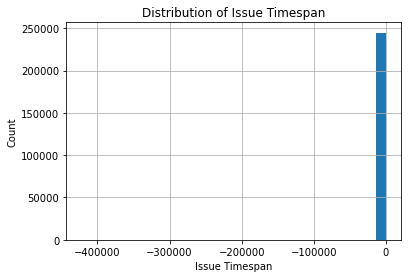

In [105]:
df.timespan_hrs[df.timespan_hrs < 8].hist(bins=30)
plt.xlabel('Issue Timespan')
plt.ylabel('Count')
plt.title('Distribution of Issue Timespan');

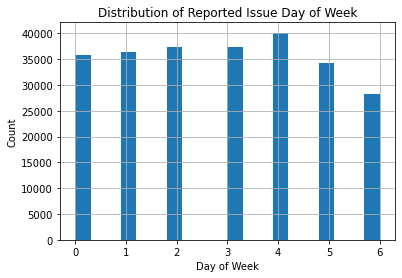

In [116]:
df.published_day.hist(bins=20)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Distribution of Reported Issue Day of Week');

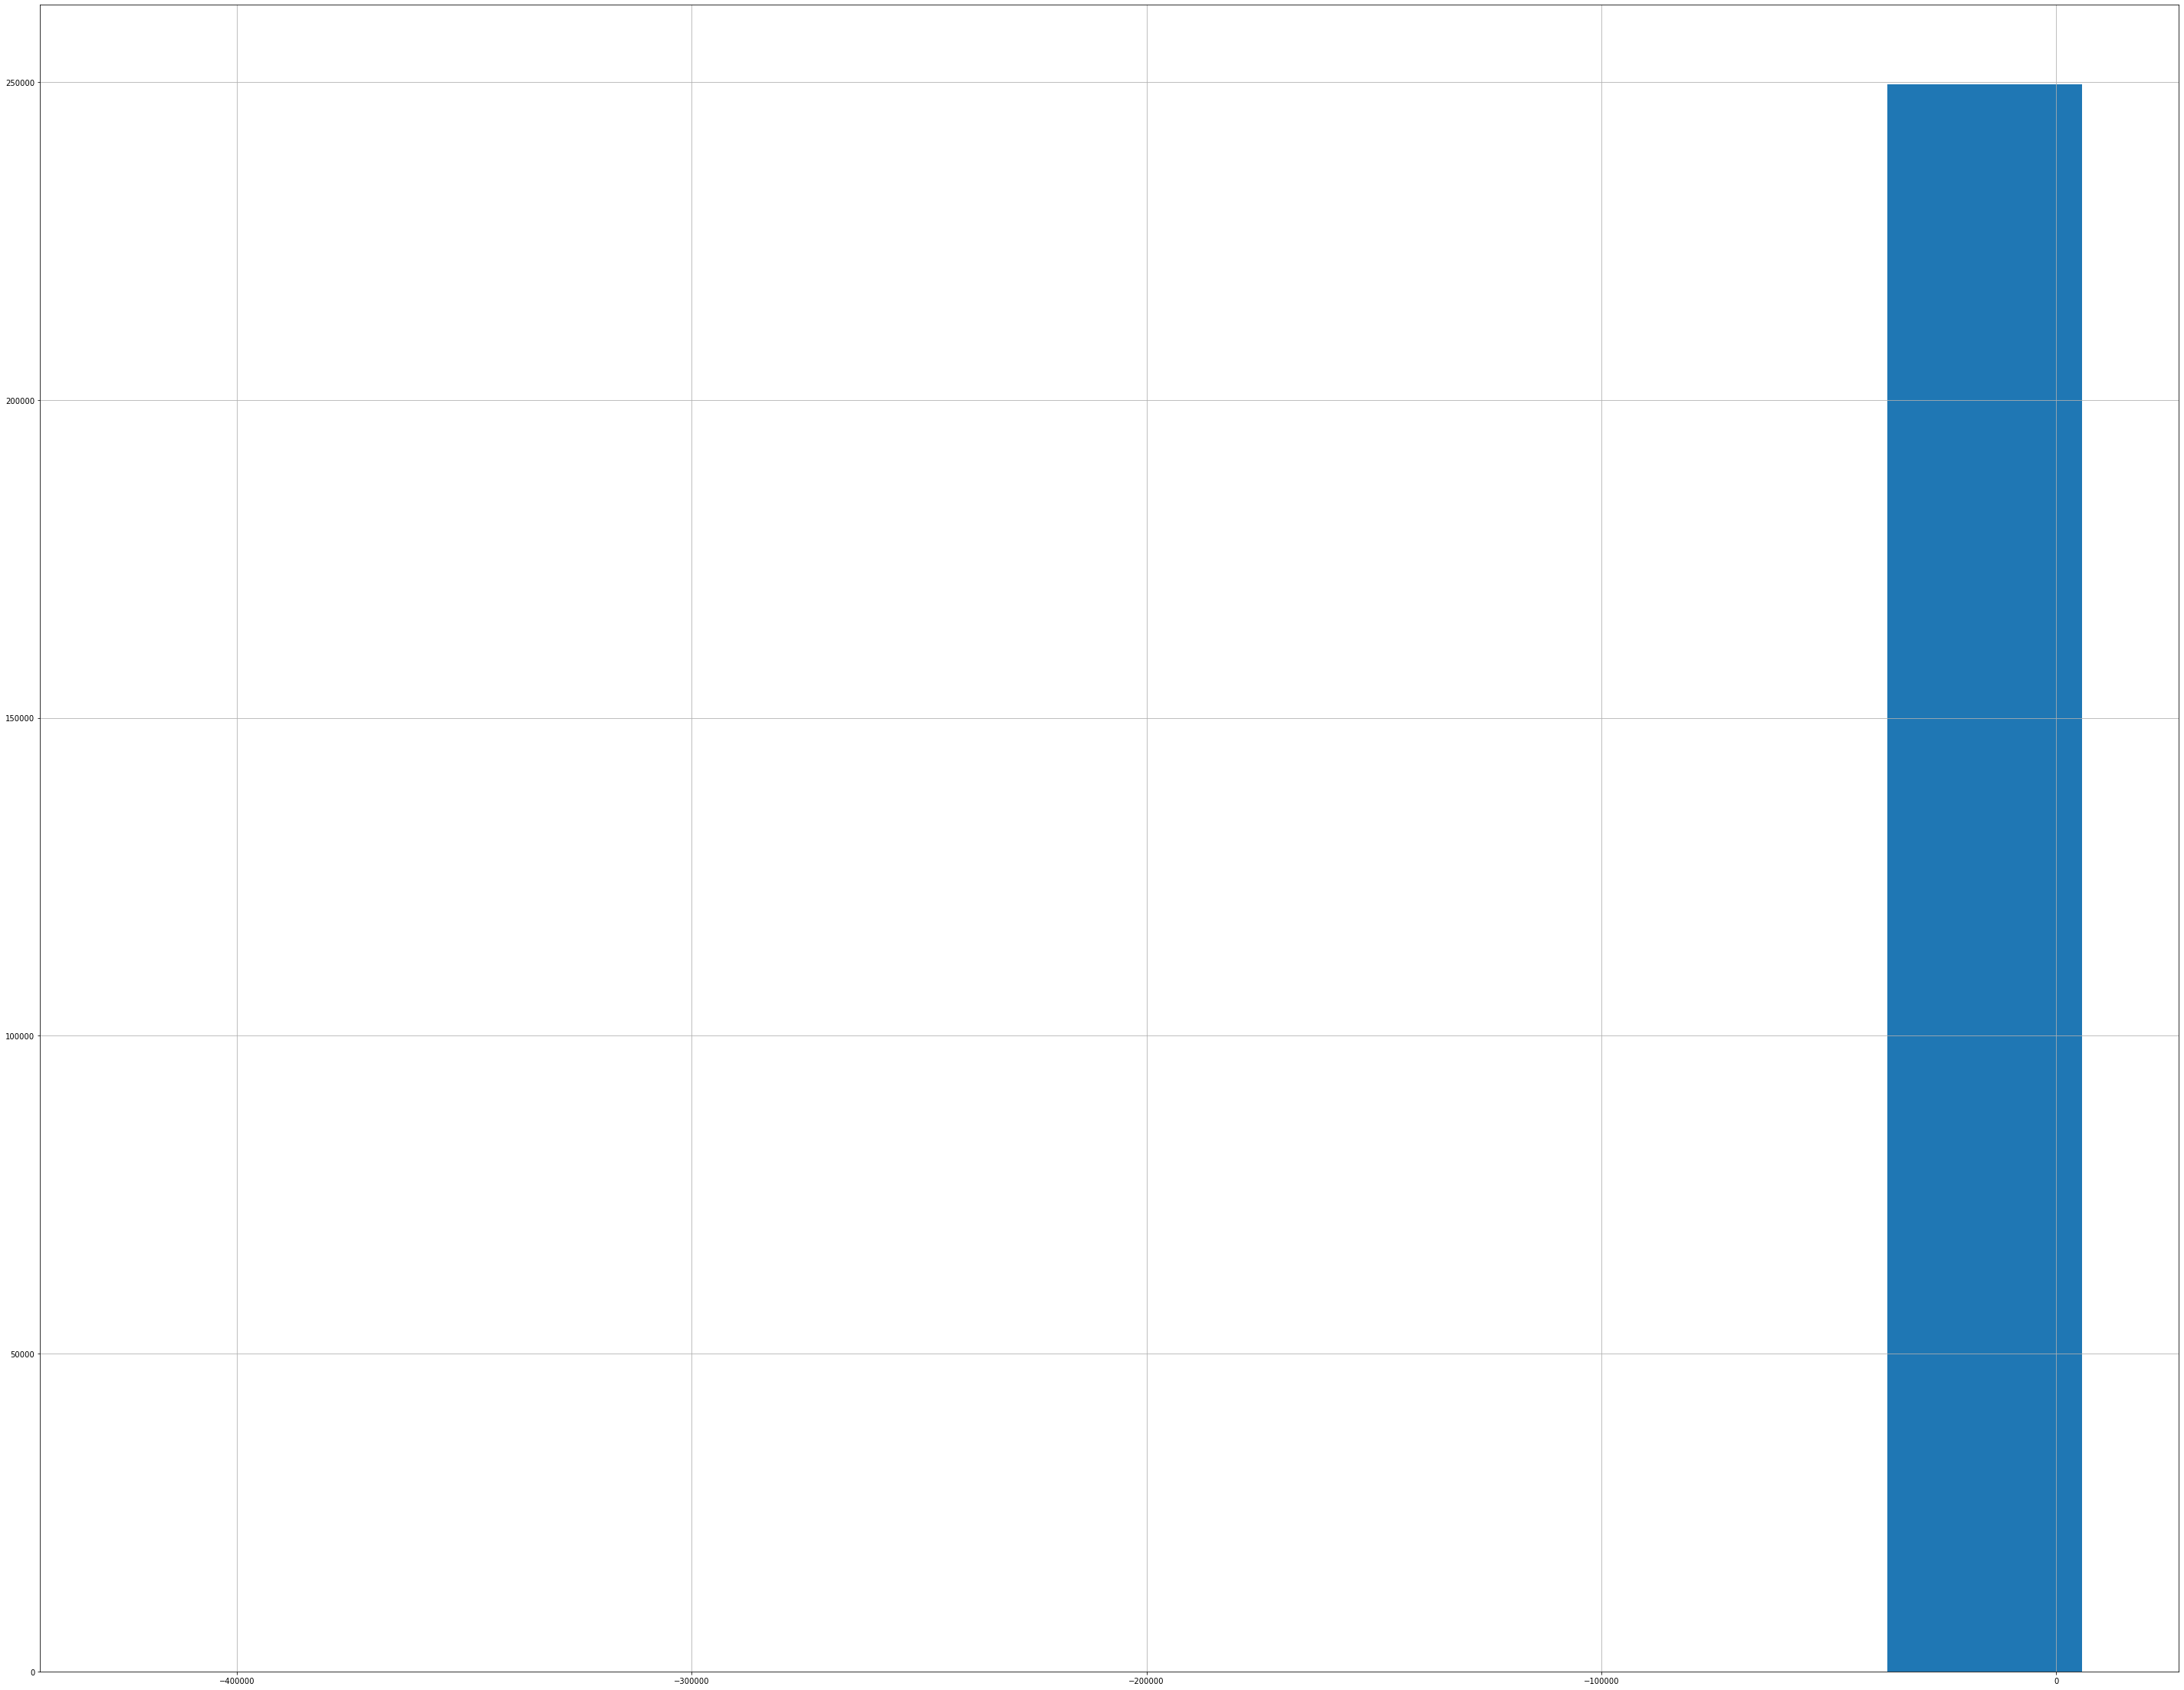

In [103]:
df.issue_reported.hist(figsize=(50,40))
plt.subplots_adjust(hspace=.5);